# Classification example 1 using Health Data with PyCaret

In [ ]:
#Fetal cardiotocography example
#Code from https://github.com/pycaret/pycaret/
#Dataset link: https://www.kaggle.com/akshat0007/fetalhr

In [ ]:
## Importing necessary libraries 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [1]:
## Reading the dataset using pandas
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/CTG.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,6/6/1998,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,6/6/1998,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
## Having a look of our data
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


# Feature Abbreviations used in the dataset :-



### FileName:	of CTG examination	
### Date:	of the examination	
### b:	start instant	
### e:	end instant	
### LBE:	baseline value (medical expert)	
### LB:	baseline value (SisPorto)	
### AC:	accelerations (SisPorto)	
### FM:	foetal movement (SisPorto)	
### UC:	uterine contractions (SisPorto)	
### ASTV:	percentage of time with abnormal short term variability  (SisPorto)	
### mSTV:	mean value of short term variability  (SisPorto)	
### ALTV:	percentage of time with abnormal long term variability  (SisPorto)	
### mLTV:	mean value of long term variability  (SisPorto)	
### DL:	light decelerations	
### DS:	severe decelerations	
### DP:	prolongued decelerations	
### DR:	repetitive decelerations	
### Width:	histogram width	
### Min:	low freq. of the histogram	
### Max:	high freq. of the histogram	
### Nmax:	number of histogram peaks	
### Nzeros:	number of histogram zeros	
### Mode:	histogram mode	
### Mean:	histogram mean	
### Median:	histogram median	
### Variance:	histogram variance	
### Tendency:	histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric	
### A:	calm sleep	
### B:	REM sleep	
### C:	calm vigilance	
### D:	active vigilance	
### SH:	shift pattern (A or Susp with shifts)	
### AD:	accelerative/decelerative pattern (stress situation)	
### DE:	decelerative pattern (vagal stimulation)	
### LD:	largely decelerative pattern	
### FS:	flat-sinusoidal pattern (pathological state)	
### SUSP:	suspect pattern	
### CLASS:	Class code (1 to 10) for classes A to SUSP	
### NSP:	Normal=1; Suspect=2; Pathologic=3	


In [3]:
## Dropping the columns which we don't need
df=df.drop(["FileName","Date","SegFile","b","e"],axis=1)

In [4]:
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [5]:
df.columns

Index(['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

## Performing some basic preprocessing techniques

In [6]:
## This will print the number of columns and rows
print(df.shape)

(2129, 35)


In [7]:
## Checking for the null values
df.isnull().sum()

LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

In [8]:
## Dropping the the rows containing null values
df=df.dropna()

In [9]:
df.isnull().sum()

LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [10]:
## Checking the data type of the columns
df.dtypes

LBE         float64
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
A           float64
B           float64
C           float64
D           float64
E           float64
AD          float64
DE          float64
LD          float64
FS          float64
SUSP        float64
CLASS       float64
NSP         float64
dtype: object

## Importing the pycaret library

In [11]:
# This command will basically import all the modules from pycaret that are necessary for classification tasks
from pycaret.classification import *

In [12]:
# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
clf=setup(data=df,target='NSP')

,Description,Value
0,session_id,7481
1,Target,NSP
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2126, 35)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
# This model will be used to compare all the model along with the cross validation
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9906,0.9950,0.9786,0.9908,0.9905,0.9733,0.9737,0.0740
rf,Random Forest Classifier,0.9899,0.9979,0.9770,0.9901,0.9898,0.9714,0.9718,0.0940
lightgbm,Light Gradient Boosting Machine,0.9899,0.9983,0.9783,0.9901,0.9898,0.9714,0.9718,0.0780
gbc,Gradient Boosting Classifier,0.9893,0.9978,0.9767,0.9894,0.9891,0.9695,0.9699,0.2870
dt,Decision Tree Classifier,0.9872,0.9812,0.9758,0.9874,0.9872,0.9641,0.9643,0.0090
ridge,Ridge Classifier,0.9845,0.0000,0.9624,0.9848,0.9842,0.9556,0.9565,0.0070
lda,Linear Discriminant Analysis,0.9845,0.9965,0.9624,0.9848,0.9842,0.9556,0.9565,0.0090
lr,Logistic Regression,0.9839,0.9969,0.9690,0.9841,0.9836,0.9542,0.9548,0.4540
nb,Naive Bayes,0.9664,0.9902,0.9696,0.9702,0.9674,0.9096,0.9115,0.0070
svm,SVM - Linear Kernel,0.9153,0.0000,0.7730,0.9222,0.9085,0.7477,0.7579,0.0140


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7481, verbose=0,
                     warm_start=False)

### The AUC score is 0.000 because it is not supported for the muli-classification tasks

### Also, from the above it is understood that Extreme Gradient Boosting(popularly known as XGBoost) model really performed well. So, we will proceed with Extreme Gradient Boosting model.

## Creating the Extreme Gradient Boosting(XGBoost) model

In [17]:
xgboost_classifier=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9866,0.9992,0.9683,0.9868,0.9863,0.9616,0.9624
1,0.9866,0.9990,0.9813,0.9866,0.9866,0.9625,0.9625
2,0.9933,1.0000,0.9841,0.9933,0.9932,0.9810,0.9812
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9933,1.0000,0.9833,0.9938,0.9933,0.9813,0.9814
5,0.9866,0.9981,0.9667,0.9868,0.9863,0.9617,0.9625
6,0.9866,0.9861,0.9667,0.9868,0.9863,0.9617,0.9625
7,0.9799,0.9974,0.9389,0.9797,0.9795,0.9424,0.9431
8,0.9932,0.9994,0.9972,0.9936,0.9933,0.9810,0.9812
9,0.9932,0.9993,0.9833,0.9933,0.9932,0.9805,0.9807


In [18]:
## Let's now check the model hyperparameters
print(xgboost_classifier)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7481, verbose=0,
                       warm_start=False)


## Tuning the hyperparametes for better performance

In [19]:
# Whenenver we compare different models or build a model, the model uses deault
#hyperparameter values. Hence, we need to tune our model to get better performance

tuned_xgboost_classifier=tune_model(xgboost_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9866,0.9990,0.9683,0.9868,0.9863,0.9616,0.9624
1,0.9933,0.9988,0.9972,0.9936,0.9934,0.9815,0.9817
2,0.9933,0.9999,0.9841,0.9933,0.9932,0.9810,0.9812
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9933,0.9992,0.9833,0.9938,0.9933,0.9813,0.9814
5,0.9866,0.9927,0.9667,0.9868,0.9863,0.9617,0.9625
6,0.9866,0.9897,0.9667,0.9868,0.9863,0.9617,0.9625
7,0.9866,0.9995,0.9556,0.9866,0.9864,0.9621,0.9623
8,0.9932,1.0000,0.9972,0.9936,0.9933,0.9810,0.9812
9,0.9865,0.9997,0.9805,0.9865,0.9865,0.9615,0.9615


#### We can clearly conclude that our tuned model has performed better than our original model with default hyperparameters. The mean accuracy increased from 0.9899 to 0.9906

#### pycaret library really makes the process of tuning hyperparameters easy
#### We just need to pass the model in the following command
#### tune_model(model_name)

## Plotting classification plots

## Classification Report

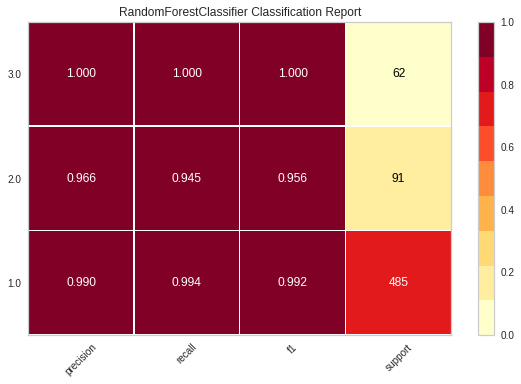

In [20]:
plot_model(tuned_xgboost_classifier,plot='class_report')

## Plotting the confusion matrix

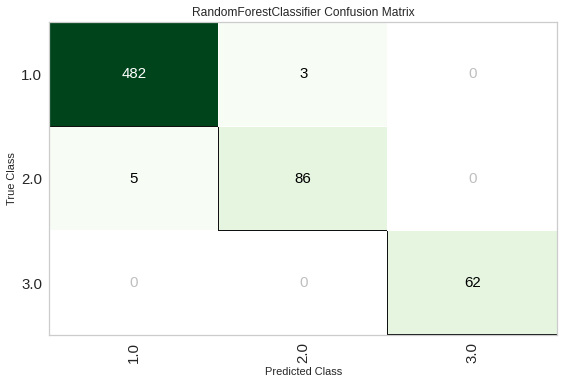

In [21]:
plot_model(tuned_xgboost_classifier,plot='confusion_matrix')

## Saving the model for future predictions

In [22]:
## This can be used to save our trained model for future use.
save_model(tuned_xgboost_classifier,"XGBOOST CLASSIFIER")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='NSP',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=11,
                                         max_featu

## Loading the saved model

In [23]:
## This can be used to load our model. We don't need to train our model again and again.
saved_model=load_model('XGBOOST CLASSIFIER')

Transformation Pipeline and Model Successfully Loaded
